### Problem Statement
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
wine = pd.read_csv('wine.csv')
wine.shape

(178, 14)

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine['Type'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [73]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


## Visualizing Raw Data

Text(0, 0.5, 'Alcalinity')

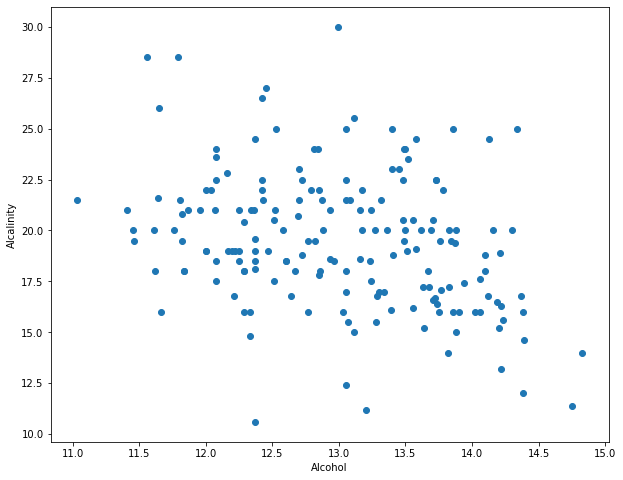

In [7]:
plt.figure(figsize=(10,8))
plt.scatter( wine['Alcohol'], wine['Alcalinity'])
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity')

Text(0, 0.5, 'Dilution')

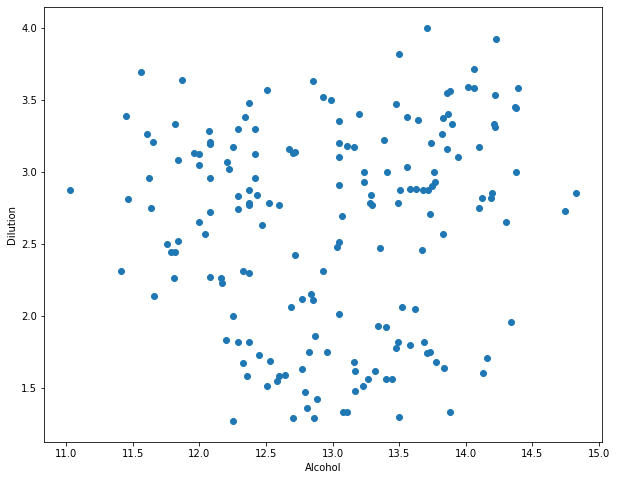

In [8]:
plt.figure(figsize=(10,8))
plt.scatter( wine['Alcohol'], wine['Dilution'])
plt.xlabel('Alcohol')
plt.ylabel('Dilution')

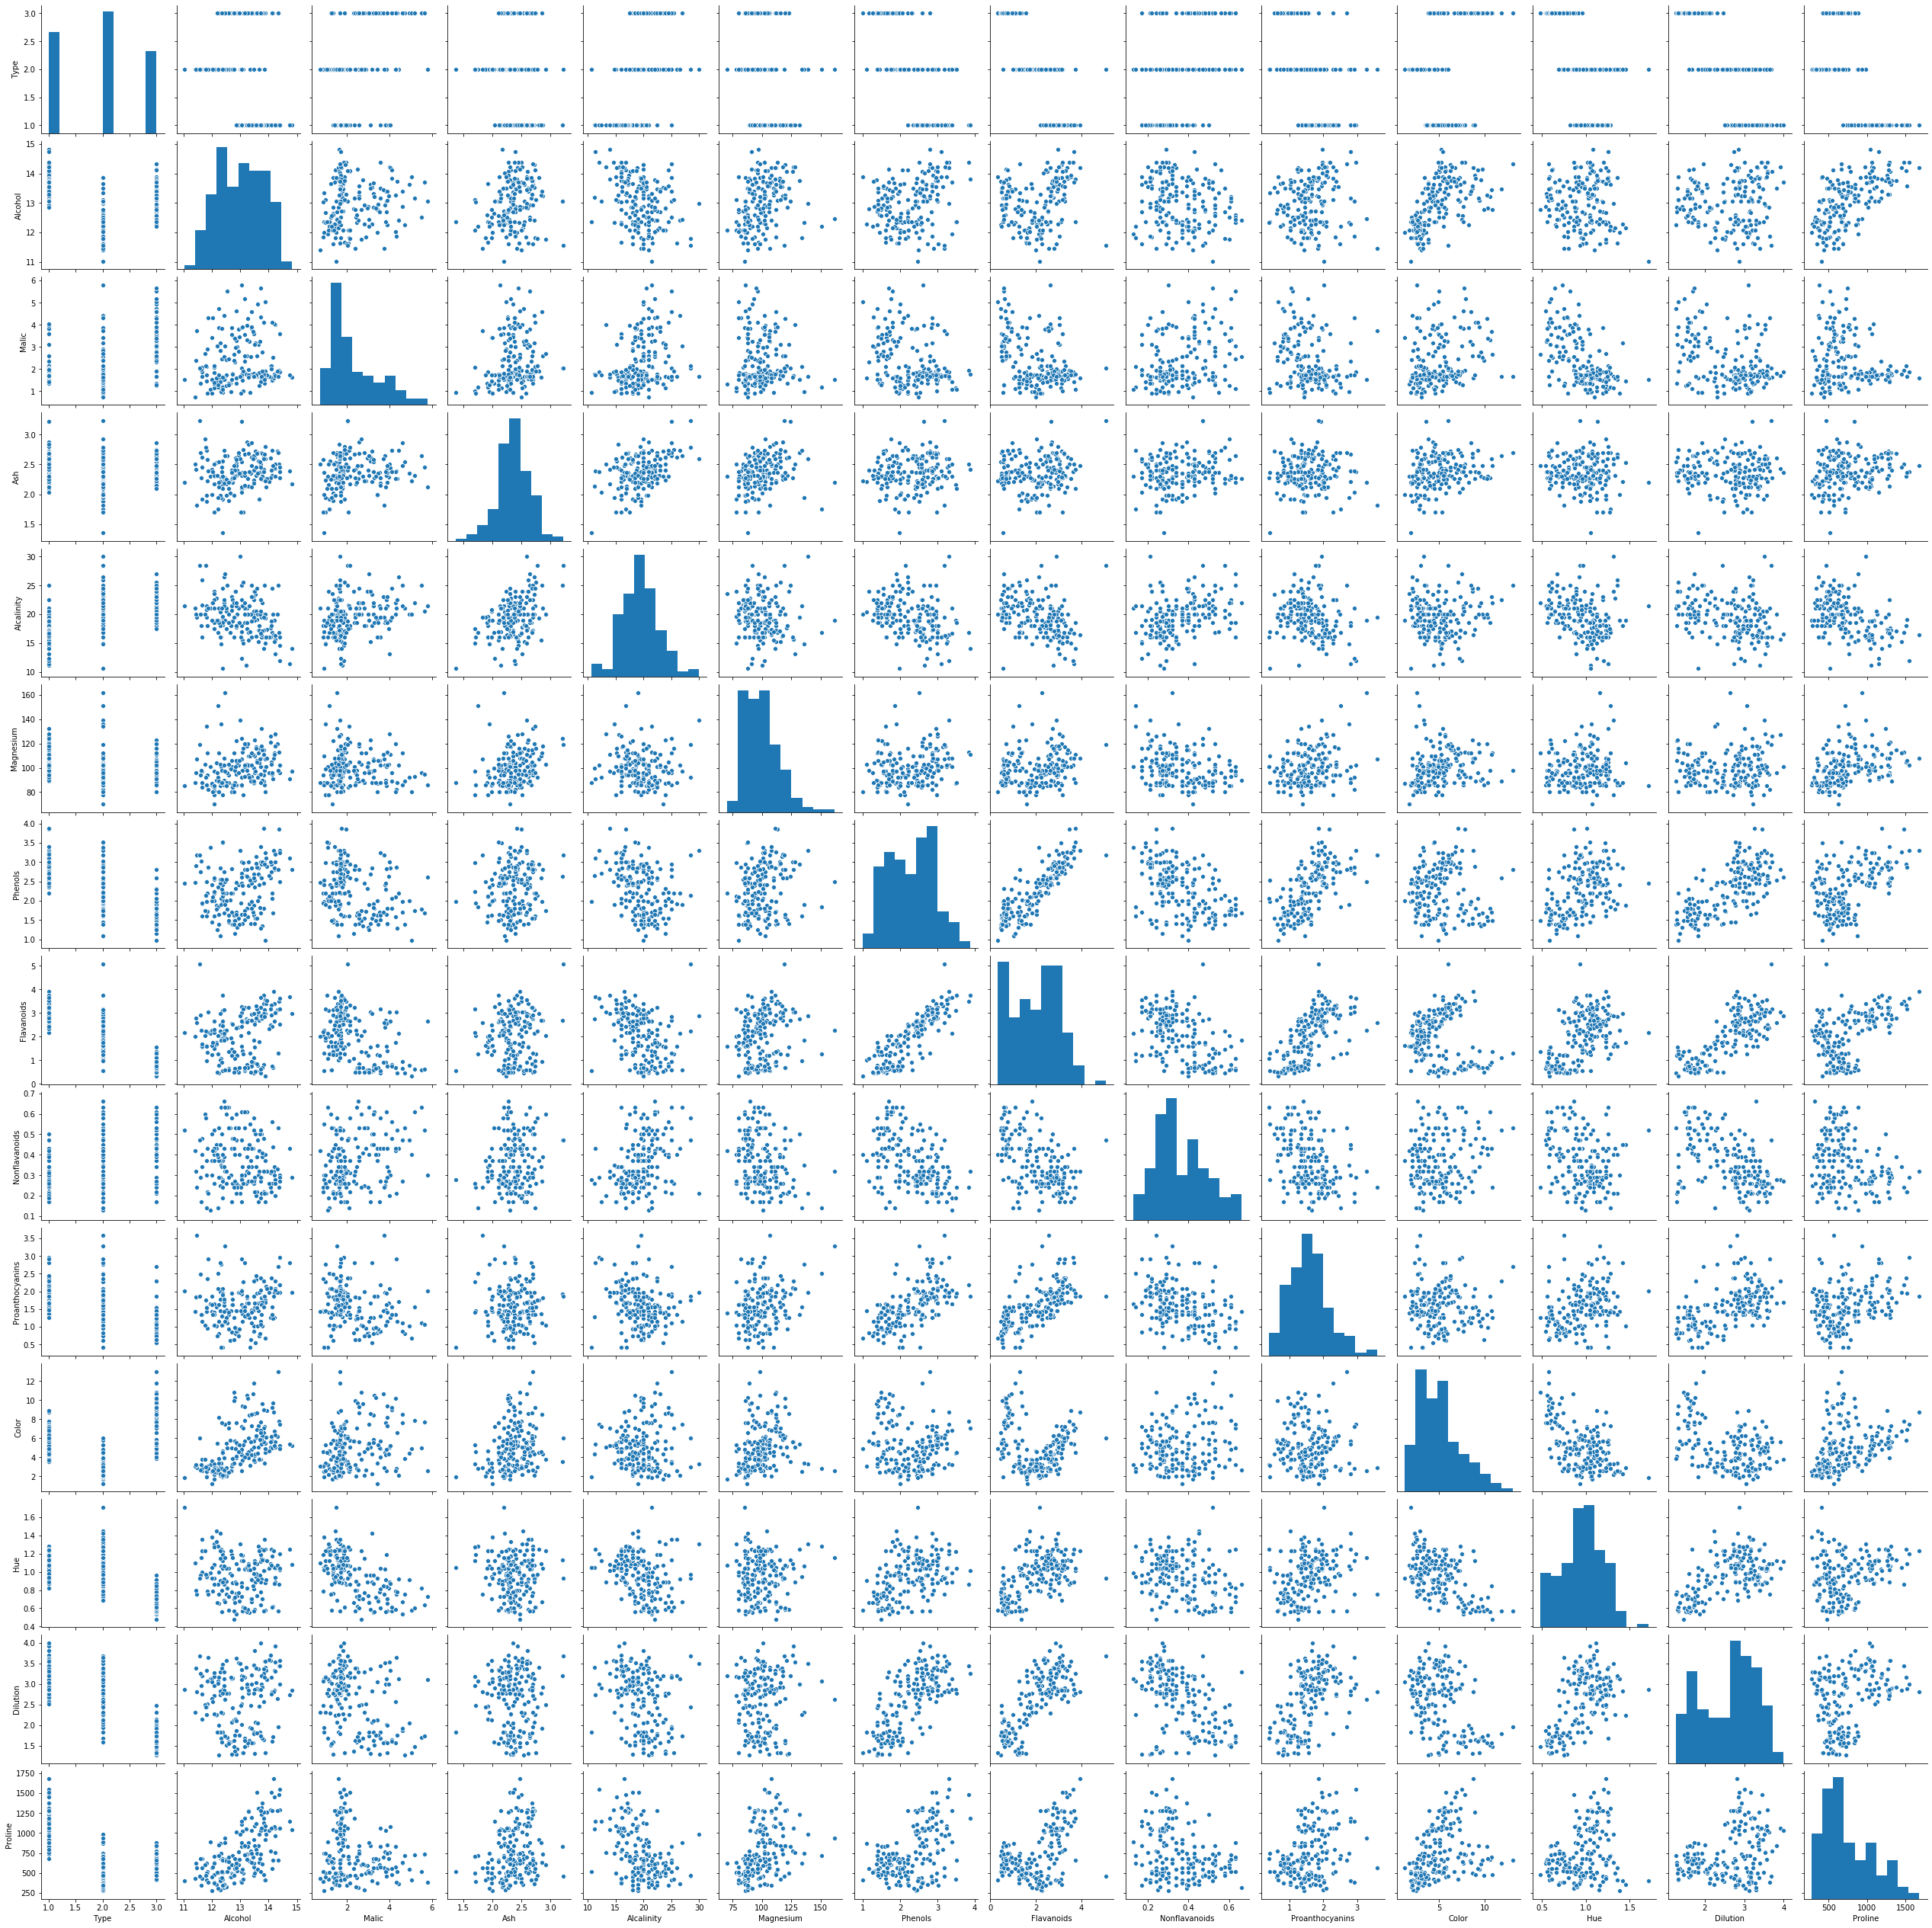

In [9]:
sns.pairplot(wine)

## Data Preprocessing

In [10]:
wine_data = wine.iloc[:, 1:]
wine_data.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [11]:
wine_std = scale(wine_data)
wine_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

### Fitting standardized data using PCA

In [12]:
pca = PCA()
pca_values = pca.fit(wine_std)

In [13]:
pca_values = pca.transform(wine_std)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### Cumulative variance plot

In [14]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0, 0.5, 'Cummulative Explained Variance')

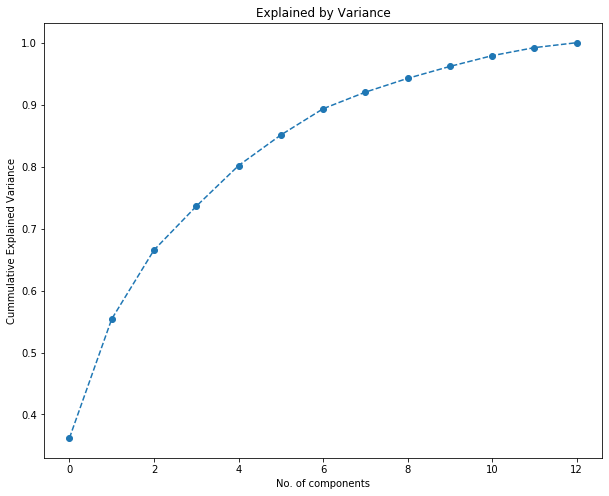

In [15]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained by Variance')
plt.xlabel('No. of components')
plt.ylabel('Cummulative Explained Variance')

### Plotting Principle components

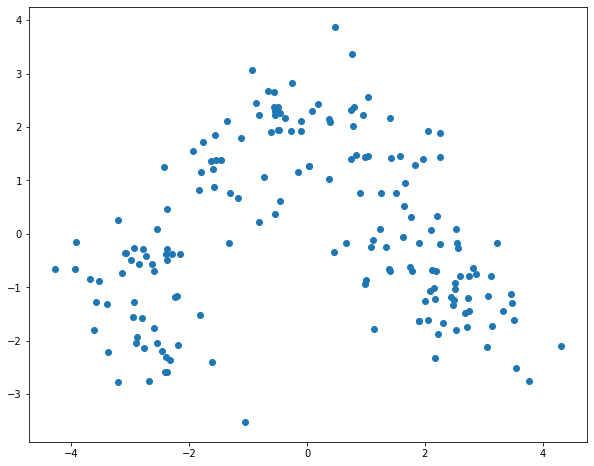

In [16]:
# plot between PCA1 and PCA2 
pc1 = pca_values[:,0:1]
pc2 = pca_values[:,1:2]
plt.figure(figsize=(10,8))
plt.scatter(pc1,pc2)

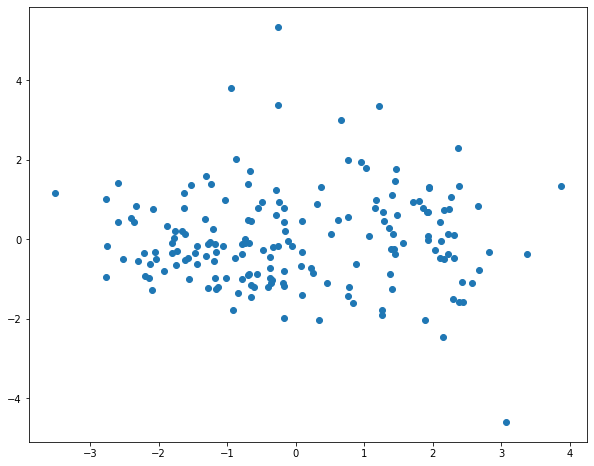

In [17]:
# plot between PCA2 and PCA3 
pca2 = pca_values[:,1:2]
pca3 = pca_values[:,2:3]
plt.figure(figsize=(10,8))
plt.scatter(pca2,pca3)

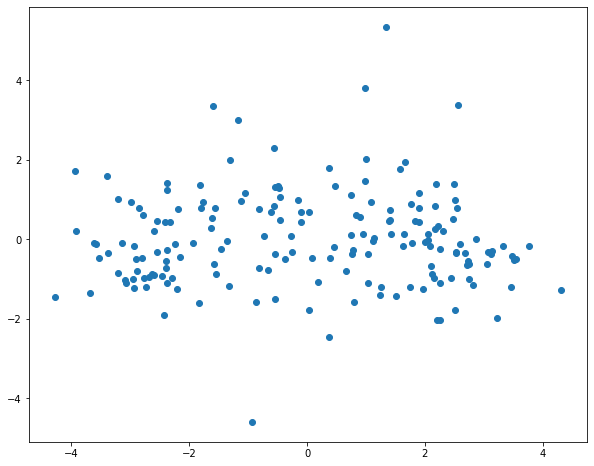

In [18]:
# plot between PCA2 and PCA3 
pca1 = pca_values[:,0:1]
pca3 = pca_values[:,2:3]
plt.figure(figsize=(10,8))
plt.scatter(pca1,pca3)

In [19]:
wine_df = pd.concat([wine,pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)
wine_df.head(5)


# selecting 3 - P-Components and merging it with wine dataframe.

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,pc1,pc2,pc3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3.316751,-1.443463,-0.165739
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2.209465,0.333393,-2.026457
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2.516740,-1.031151,0.982819
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3.757066,-2.756372,-0.176192
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008908,-0.869831,2.026688


In [20]:
pca_df = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)
pca_df.head(5)

# seperate dataframe of P-Components which later will be used for visualizing clusters.

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


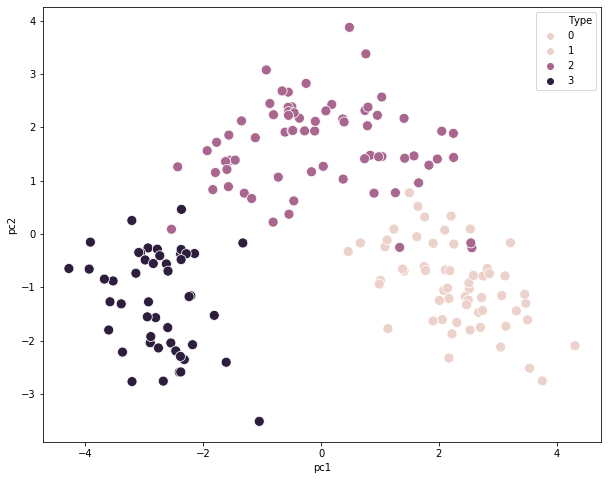

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=wine_df,x='pc1',y='pc2',s=100,hue='Type')

# K-Means Clustering with PCA

In [34]:
pca_values1 = pca_df.values
pca_values1

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [33]:
wcss = []
for i in range(1,12):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    kmeans_pca.fit(pca_values1)
    wcss.append(kmeans_pca.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Cummulative Explained Variance')

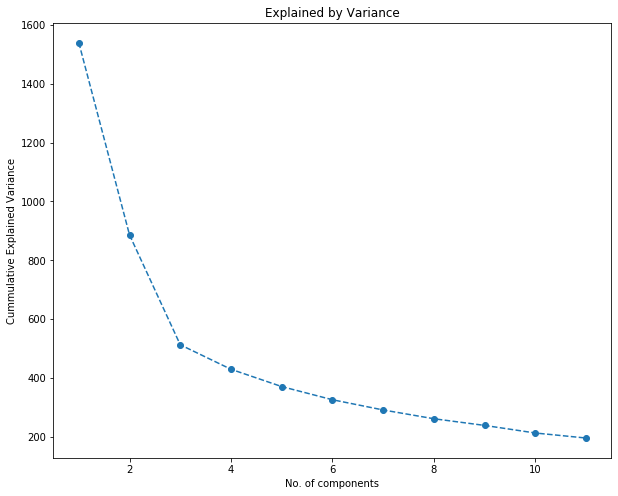

In [35]:
plt.figure(figsize=(10,8))
plt.plot(range(1,12),wcss, marker = 'o', linestyle = '--')
plt.title('Explained by Variance')
plt.xlabel('No. of components')
plt.ylabel('Cummulative Explained Variance')

- Elbow Method: 
The approach consists of looking for a kink or elbow in the WCSS (within-cluster sum of squares ) graph. 
Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother.
In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a three-cluster solution.

In [36]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)

In [37]:
kmeans_pca.fit(pca_values1)

KMeans(n_clusters=3, random_state=40)

In [38]:
df_pcs_kmeans = pd.concat([wine.reset_index(drop = True), pd.DataFrame(pca_values1)], axis = 1)

In [39]:
df_pcs_kmeans.columns.values[-3:] = ['PC1', 'PC2', 'PC3']

In [40]:
df_pcs_kmeans['Clusters'] = kmeans_pca.labels_

In [41]:
df_pcs_kmeans['Segments'] = df_pcs_kmeans['Clusters'].map({0:'First', 1:'Second', 2:'Third'})

## Plotting Clusters

In [65]:
x = df_pcs_kmeans['PC1']
y = df_pcs_kmeans['PC2']
z = df_pcs_kmeans['PC3']

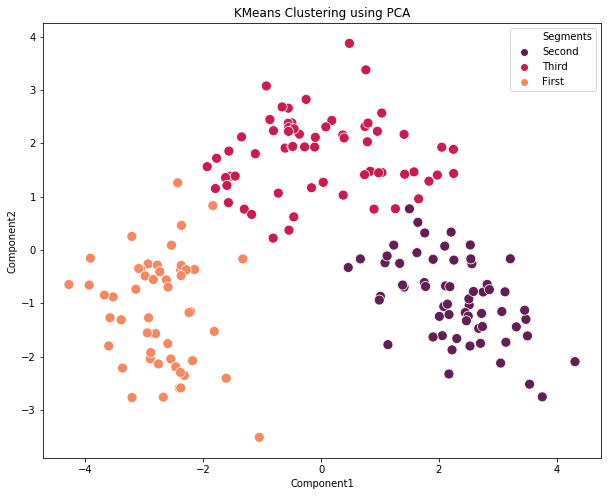

In [66]:
plt.figure(figsize= (10,8))
sns.scatterplot(x, y, hue = df_pcs_kmeans['Segments'], palette= 'rocket', s=100)
plt.title('KMeans Clustering using PCA')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.show()

# Hierarchical Clustering with PCA

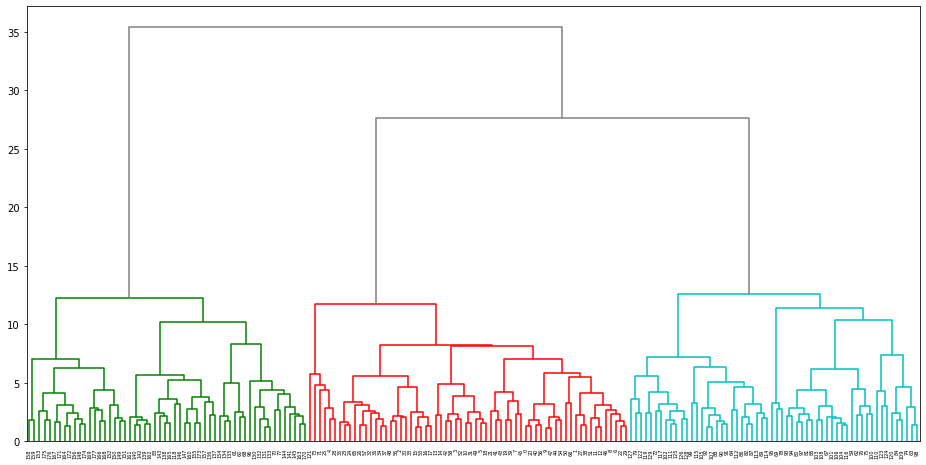

In [95]:
# create dendrogram for standardized wine data
plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(wine_std, method='ward'), color_threshold=20, 
               above_threshold_color="grey")

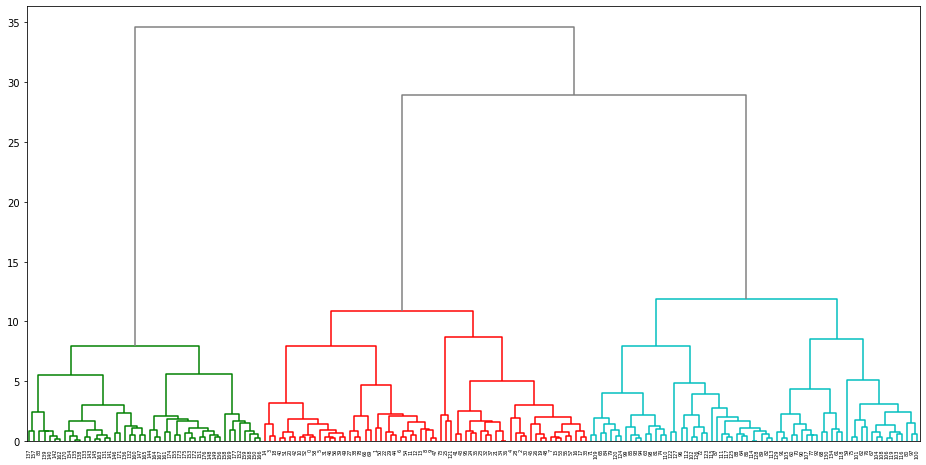

In [99]:
# create dendrogram for principle components.

plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(pca_values1, method='ward'), color_threshold=20, 
               above_threshold_color="grey")